In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [80]:
data = pd.read_csv('B:/Sem 7 Docs/ML - Core Concepts and Application/Assignments/car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [37]:
data.shape

(301, 9)

In [38]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [39]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [42]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [43]:
all_cols = data.columns
numerical_cols = data._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))

In [44]:
numerical_cols, categorical_cols

(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'],
 ['Transmission', 'Car_Name', 'Fuel_Type', 'Seller_Type'])

In [45]:
[data[x].unique() for x in categorical_cols[1:] ]

[array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
        's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
        '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
        'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
        'camry', 'land cruiser', 'Royal Enfield Thunder 500',
        'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
        'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
        'Royal Enfield Thunder 350', 'KTM 390 Duke ',
        'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
        'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
        'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
        'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
        'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
        'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
        'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
        'TVS A

In [46]:
data.drop(['Car_Name'], inplace=True, axis=1)

In [47]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Now, for the year column, what we need is the difference between current year (2020) and the year when car was manufactured. This will give us the number of years how old car is.

In [48]:
data['Car_Age'] = 2020 - data.Year
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [49]:
data.drop(['Year'], inplace=True, axis=1)

In [50]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [51]:
data.shape

(301, 9)

In [52]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


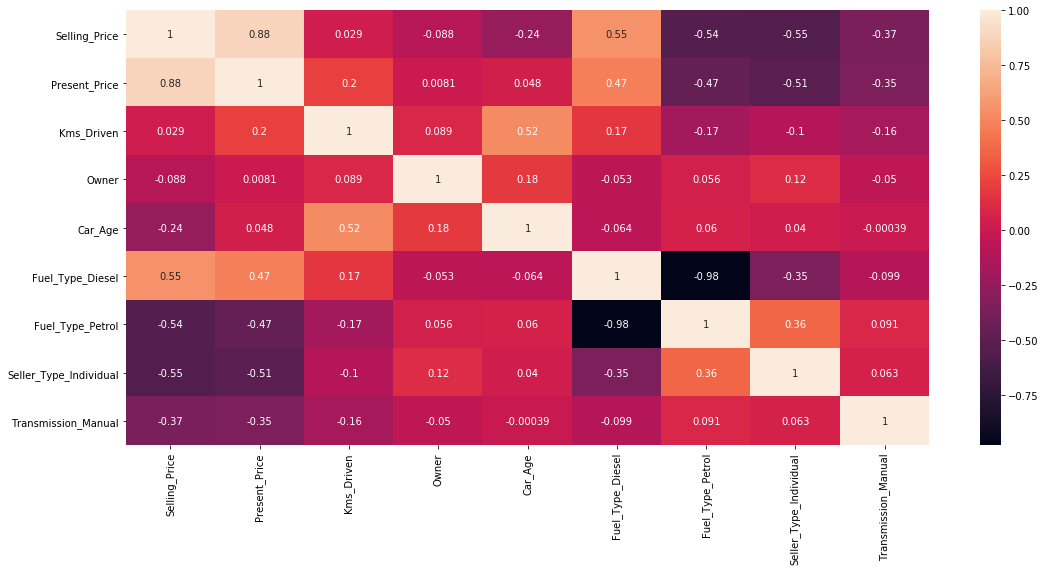

In [53]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [54]:
y = data.pop('Selling_Price')
X = data

In [55]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [56]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [57]:
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

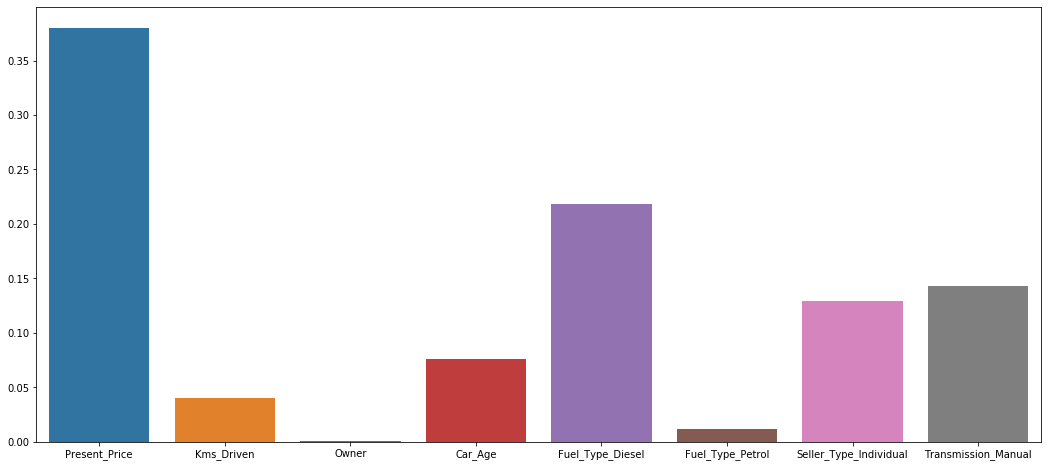

In [58]:
plt.figure(figsize=(18,8))
sns.barplot(x=data.columns, y=model.feature_importances_)
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train.shape, X_test.shape

((240, 8), (61, 8))

In [61]:
reg = LinearRegression()

In [62]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_pred = reg.predict(X_test)

In [64]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 1.8651552135513738


In [65]:
def regression_model_cv(model, k=5):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=k)
    rmse = np.sqrt(-scores)
    print('Reg rmse:', rmse)
    print('Reg mean:', rmse.mean ())

In [66]:
regression_model_cv(LinearRegression())


Reg rmse: [1.57641858 3.76010806 1.78579366 2.07736038 1.00509777]
Reg mean: 2.040955688564603


In [67]:
regression_model_cv(LinearRegression(), k=3)

Reg rmse: [3.96788247 3.50872992 1.33410571]
Reg mean: 2.9369060332311143


In [68]:
regression_model_cv(LinearRegression(), k=6)

Reg rmse: [1.41113576 4.81351792 1.15367112 3.00668935 1.29518679 0.93136651]
Reg mean: 2.101927909569228


In [69]:
regression_model_cv(Ridge())

Reg rmse: [1.56682175 3.77488245 1.77440732 2.06374556 1.00039647]
Reg mean: 2.0360507097794187


In [70]:
regression_model_cv(Lasso())

Reg rmse: [1.57991968 4.24751326 1.69273144 1.90555834 1.19633902]
Reg mean: 2.1244123473501864


In [71]:
clf = RandomForestRegressor()

In [72]:
n_estimators = [100,200,300,500]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 15, 20]

In [73]:
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth
}

In [74]:
clf_cv = RandomizedSearchCV(estimator=clf, param_distributions=grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42)

In [75]:
clf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, max_features=sqrt, max_depth=20 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=200, max_features=sqrt, max_depth=20 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=200, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=200, max_features=sqrt, max_depth=20 ...............
[CV]  n_estimators=200, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=200, max_features=sqrt, max_depth=20 ...............
[CV]  n_estimators=200, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=200, max_features=sqrt, max_depth=20 ...............
[CV]  n_estimators=200, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=500, max_features=sqrt, max_depth=10 ...............
[CV]  n_estimators=500, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=500, max_features=sqrt, max_depth=10 ...............
[CV]  n_estimators=500, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=500, max_features=sqrt, max_depth=10 ...............
[CV]  n_estimators=500, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=500, max_features=sqrt, max_depth=10 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   20.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [76]:
preds = clf_cv.predict(X_test)
preds

array([ 0.42941381, 10.6856    ,  4.99211905,  0.2188021 ,  8.17181429,
        6.49224213,  1.08451279,  0.56495381,  0.46520667,  6.88185   ,
        7.90321667,  1.05834453,  7.97317143,  0.4528    ,  5.2918074 ,
        2.61525   ,  1.14222989, 14.51186   ,  0.46455667,  1.6095    ,
        0.3601592 ,  8.00145363,  4.73790833,  2.72366667,  0.51976144,
        3.63606667,  5.36221905,  3.18526429,  1.1749739 ,  1.16466795,
        0.4224697 ,  9.56369372,  0.46388006,  2.65700595,  7.93465   ,
        4.28690693,  6.567     ,  6.6707    ,  2.63710714,  7.1438    ,
        4.5673    ,  3.3979    ,  4.9789012 ,  0.56019119,  6.18358114,
        0.72556099,  8.48131667,  7.3145    ,  2.96759524,  3.62967917,
        4.89798637,  1.5511    , 22.2509    , 20.33705   ,  6.61846018,
       10.45331238,  5.09559134,  9.19705   ,  2.69935417,  6.8210131 ,
        0.24641139])

In [77]:
rmse_value = mean_squared_error(y_test, preds, squared=False)
rmse_value

0.9891808781818656

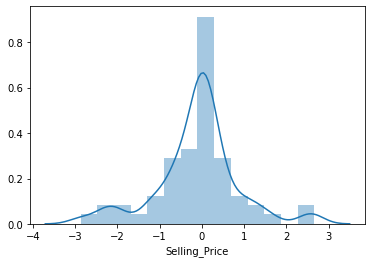

In [78]:
sns.distplot(y_test-preds);

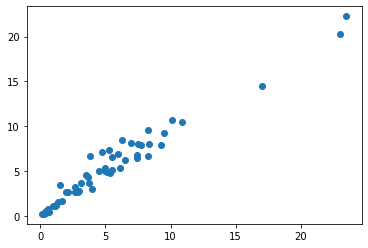

In [79]:
plt.scatter(y_test, preds);